## Investigation On Intervals and Determine whether it's meal

In [2]:
import meals as ml
import tools as tl
import paths

### Control Group

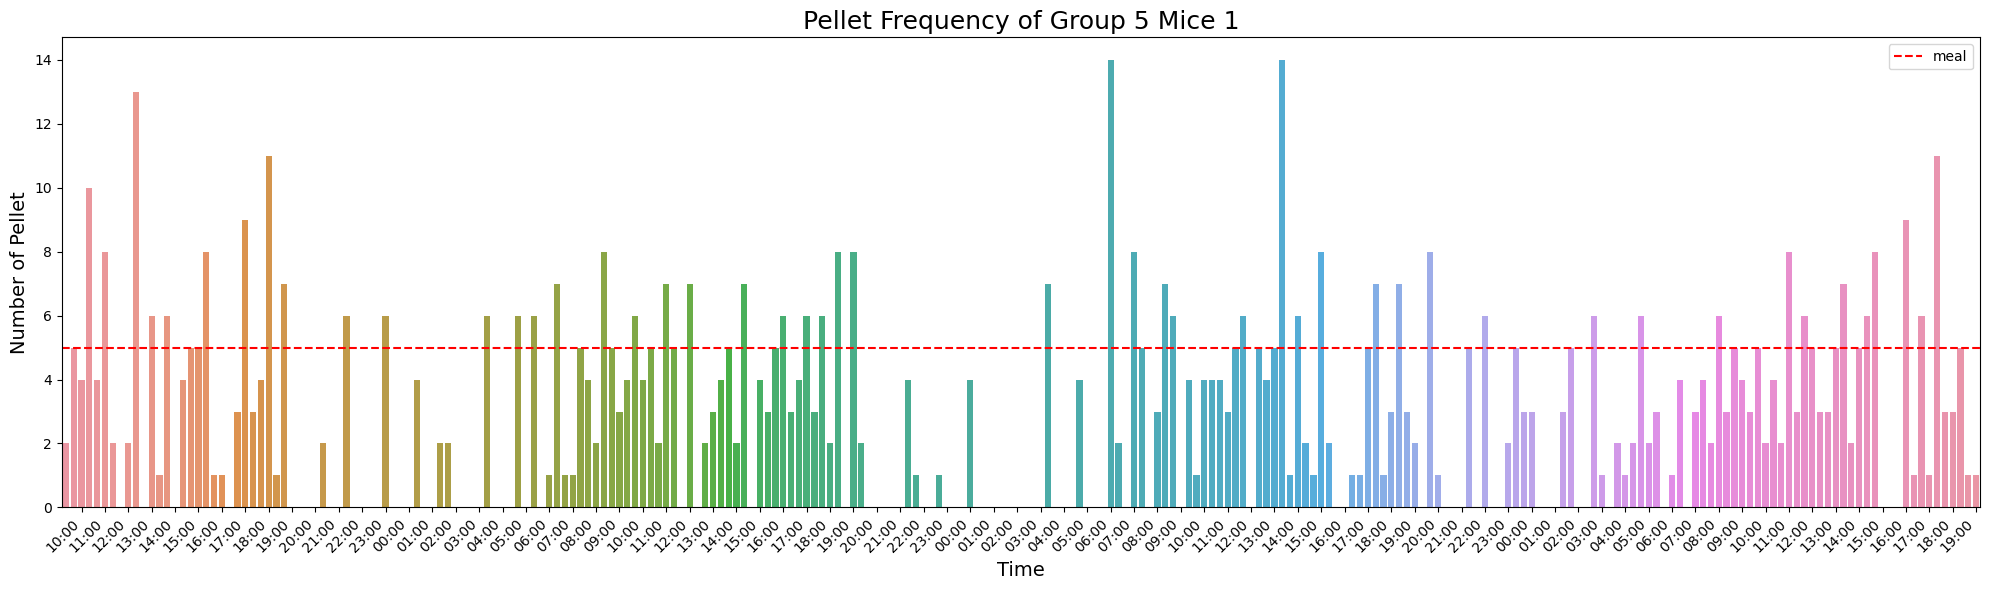

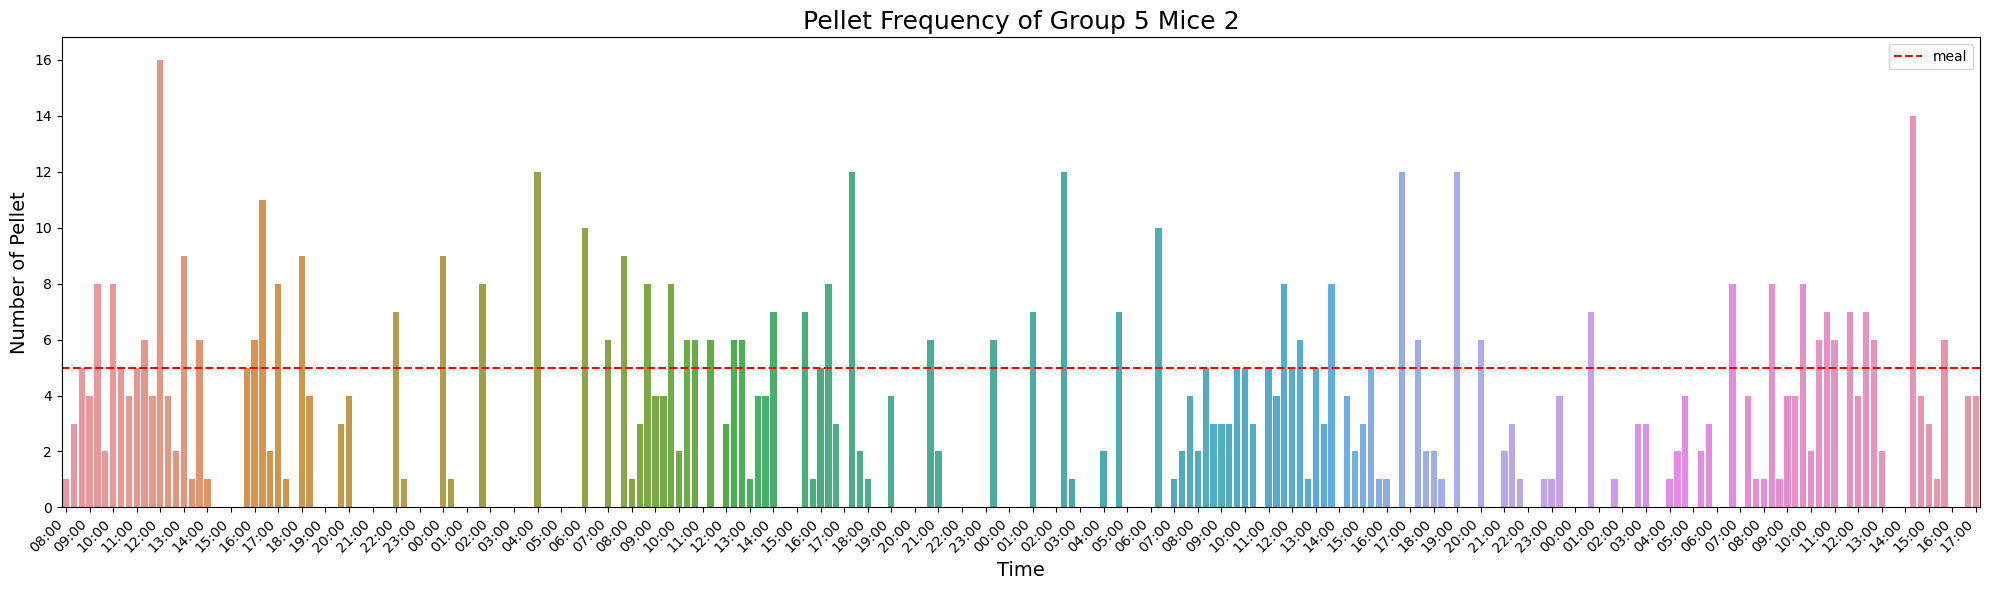

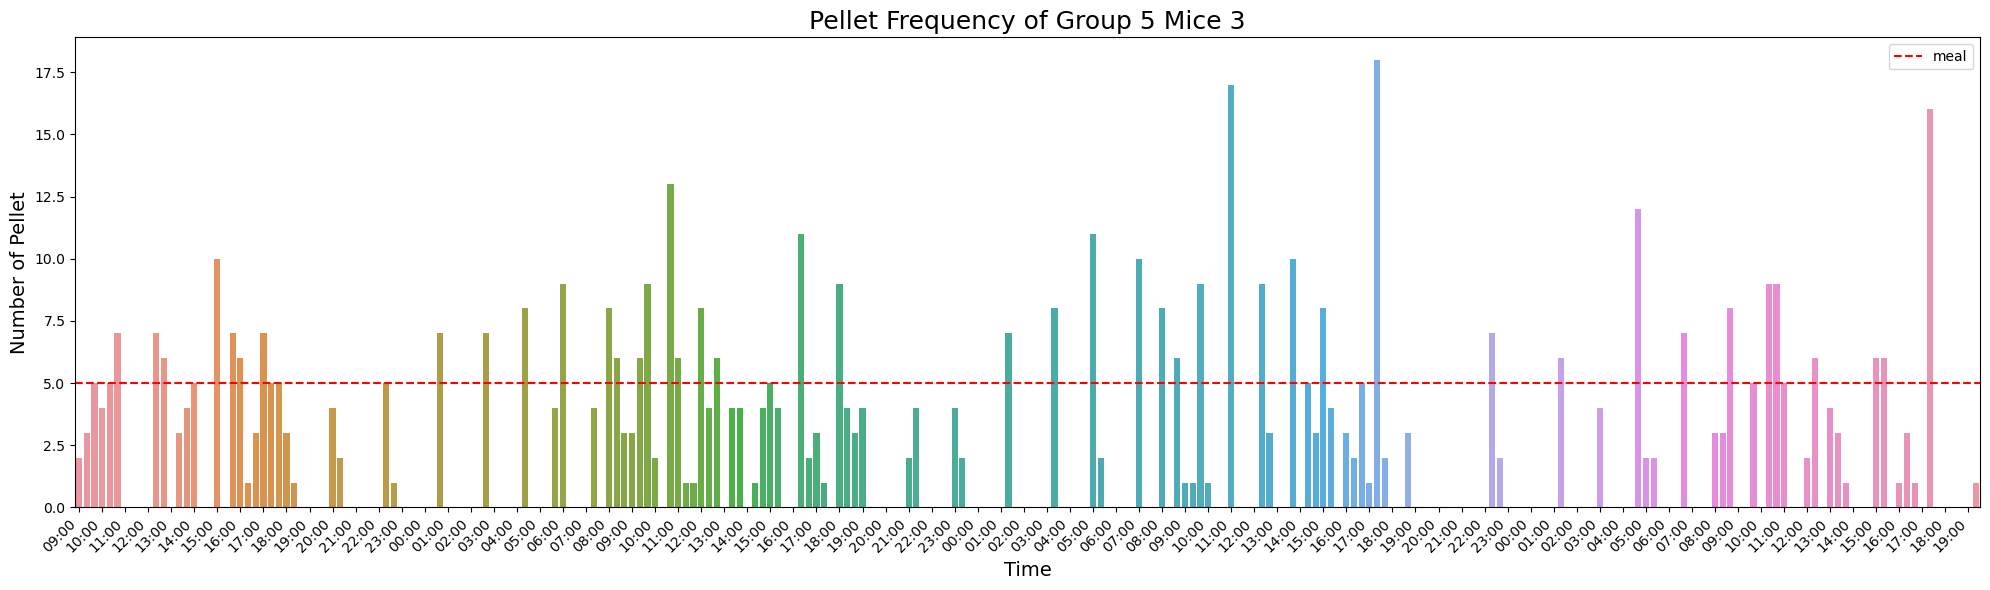

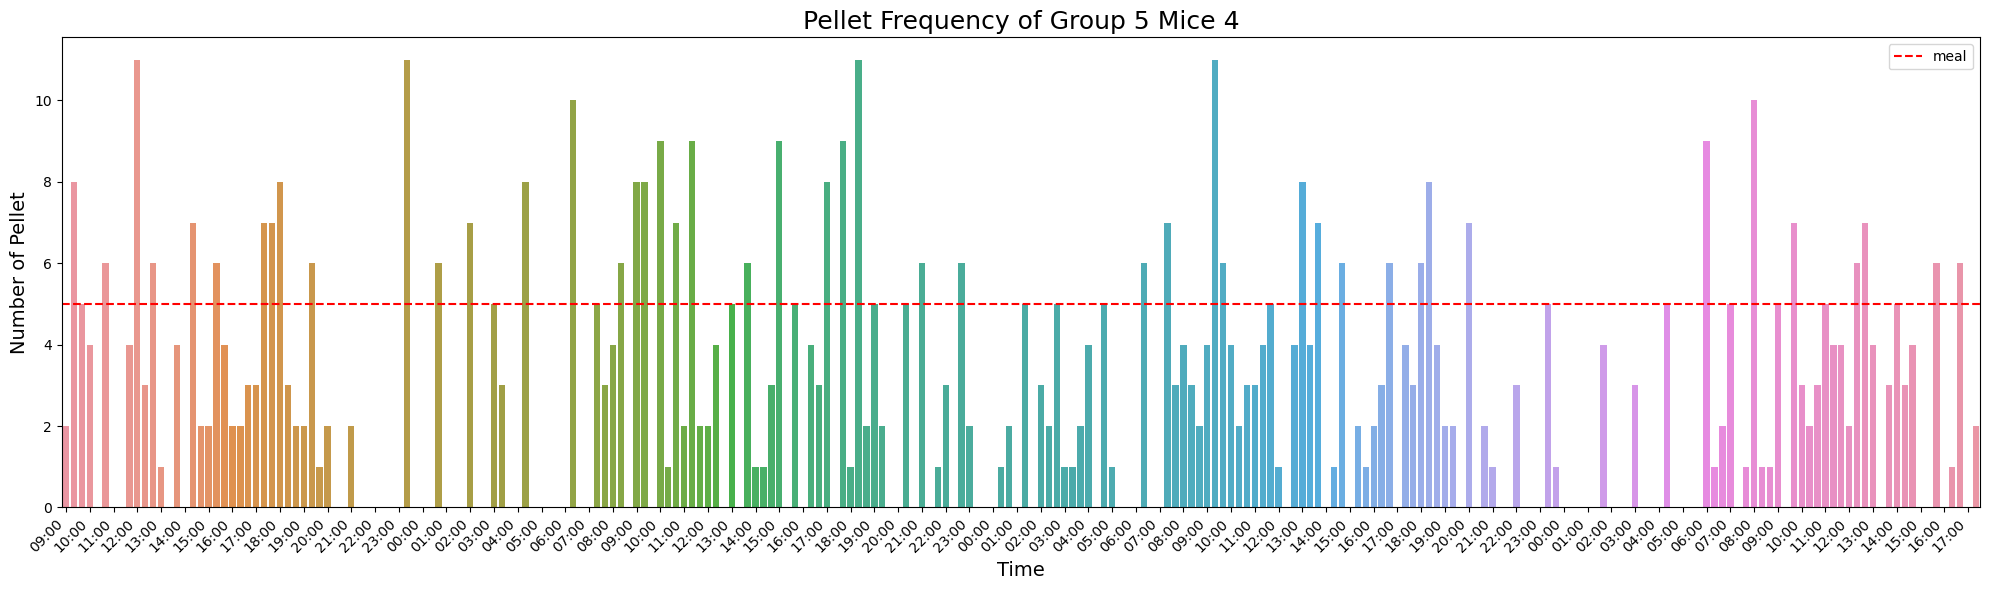

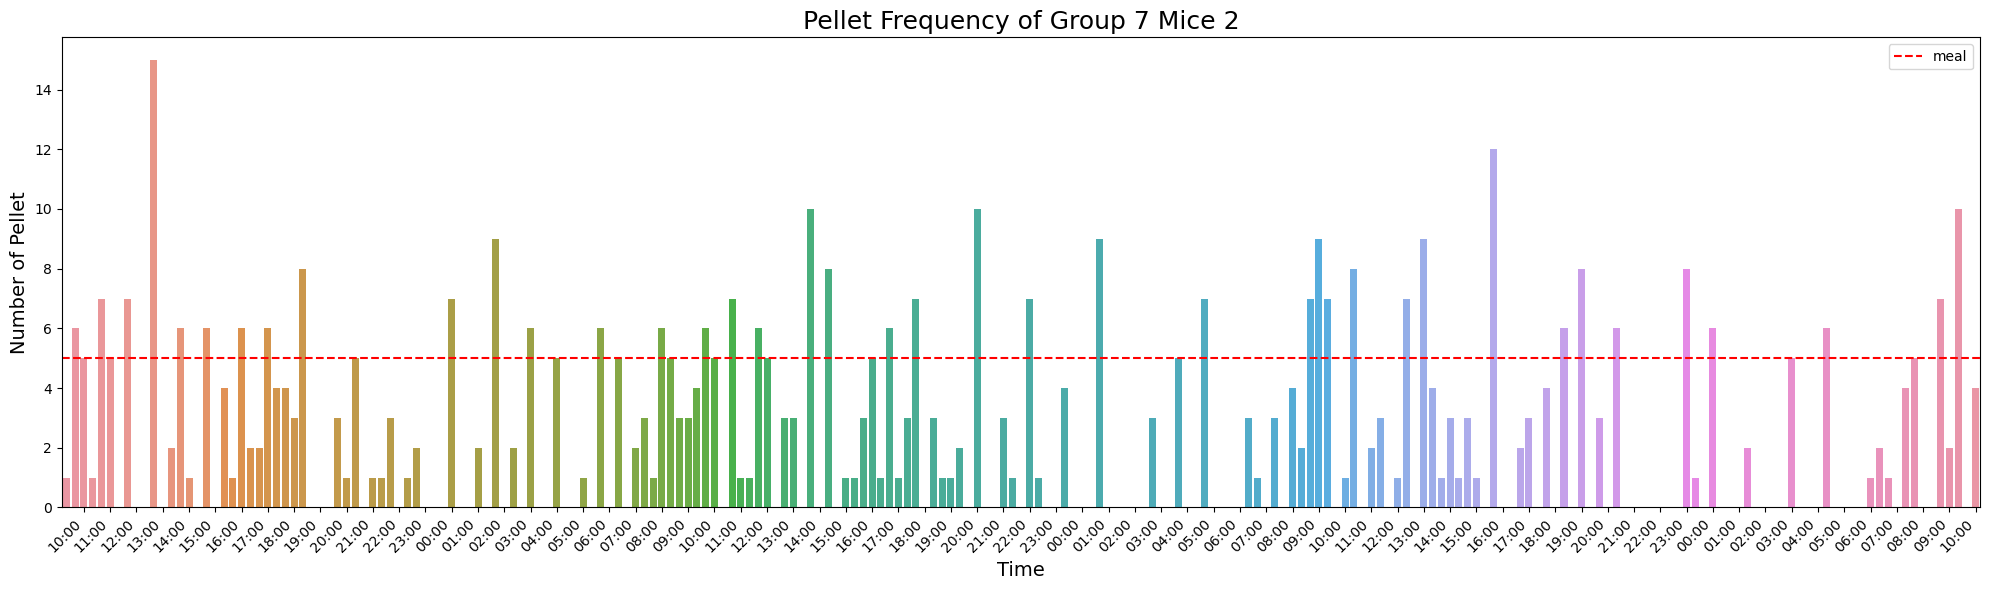

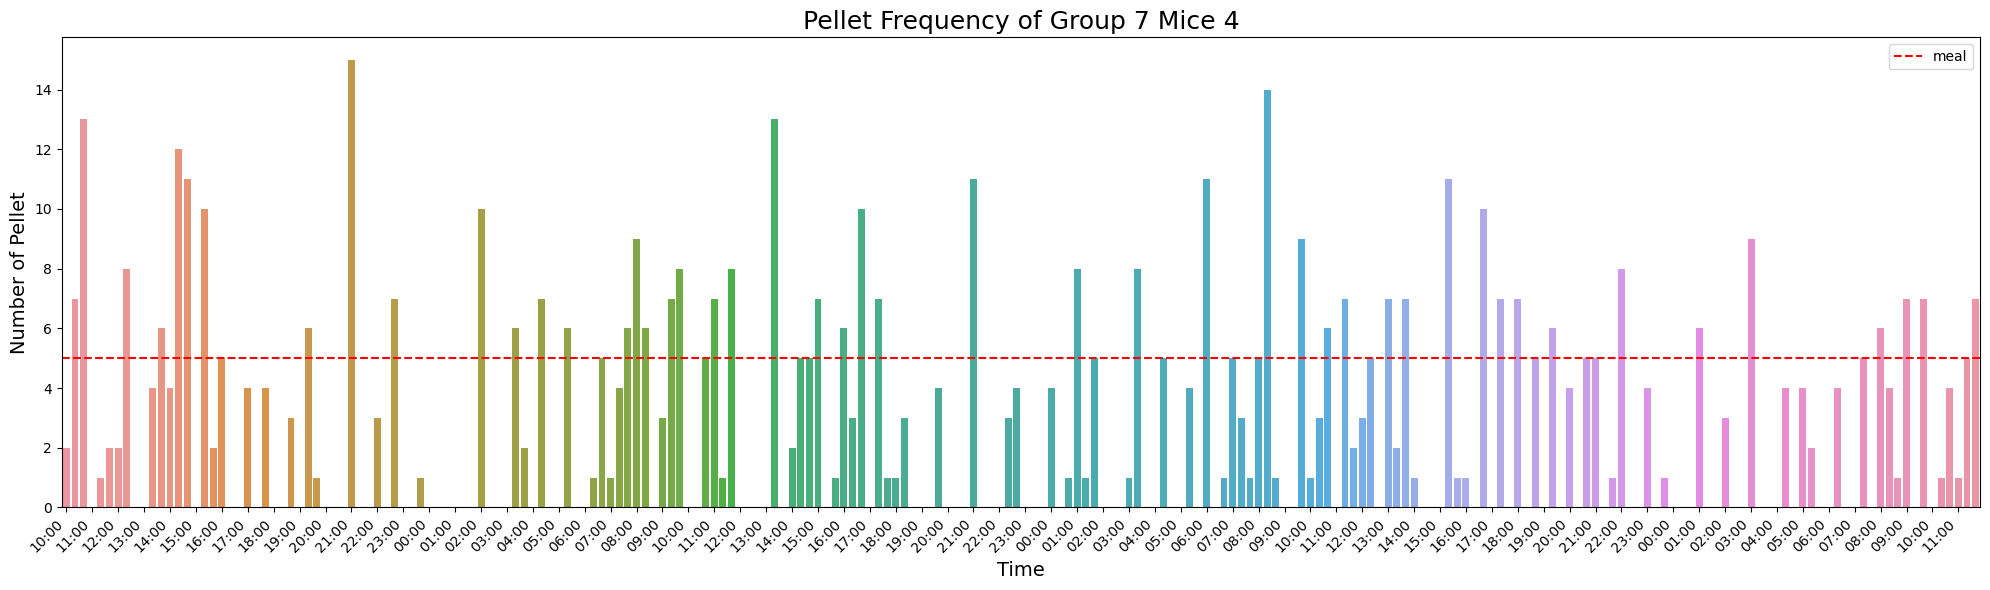

[8.743, 8.432, 7.142, 8.203, 7.115, 8.253]


In [3]:
ctrl_avg_interval = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    ctrl_avg_interval.append(ml.average_pellet(group))
    ml.graph_pellet_frequency(group, bhv, num)
print(ctrl_avg_interval)

### Cask Group

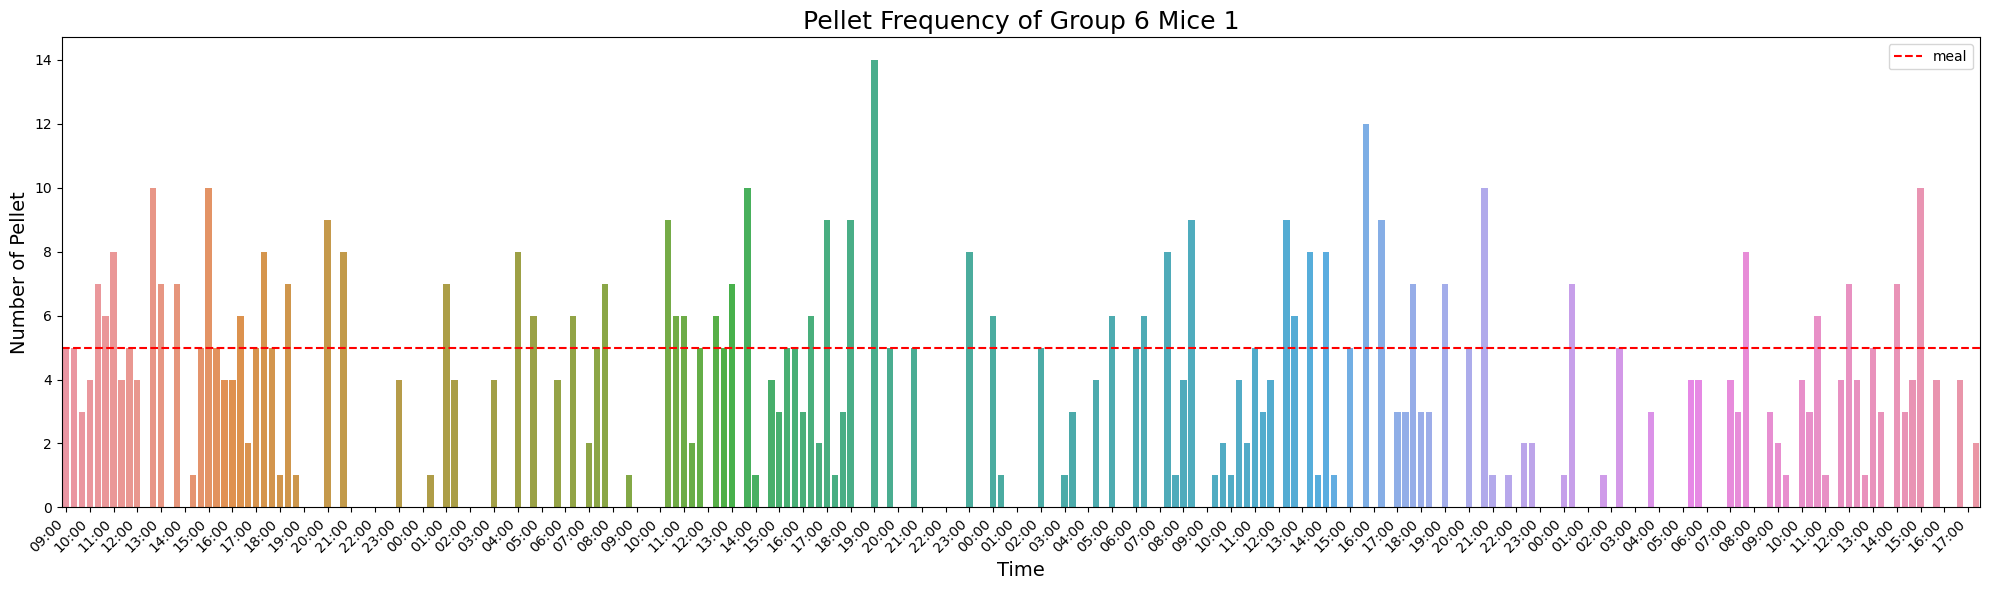

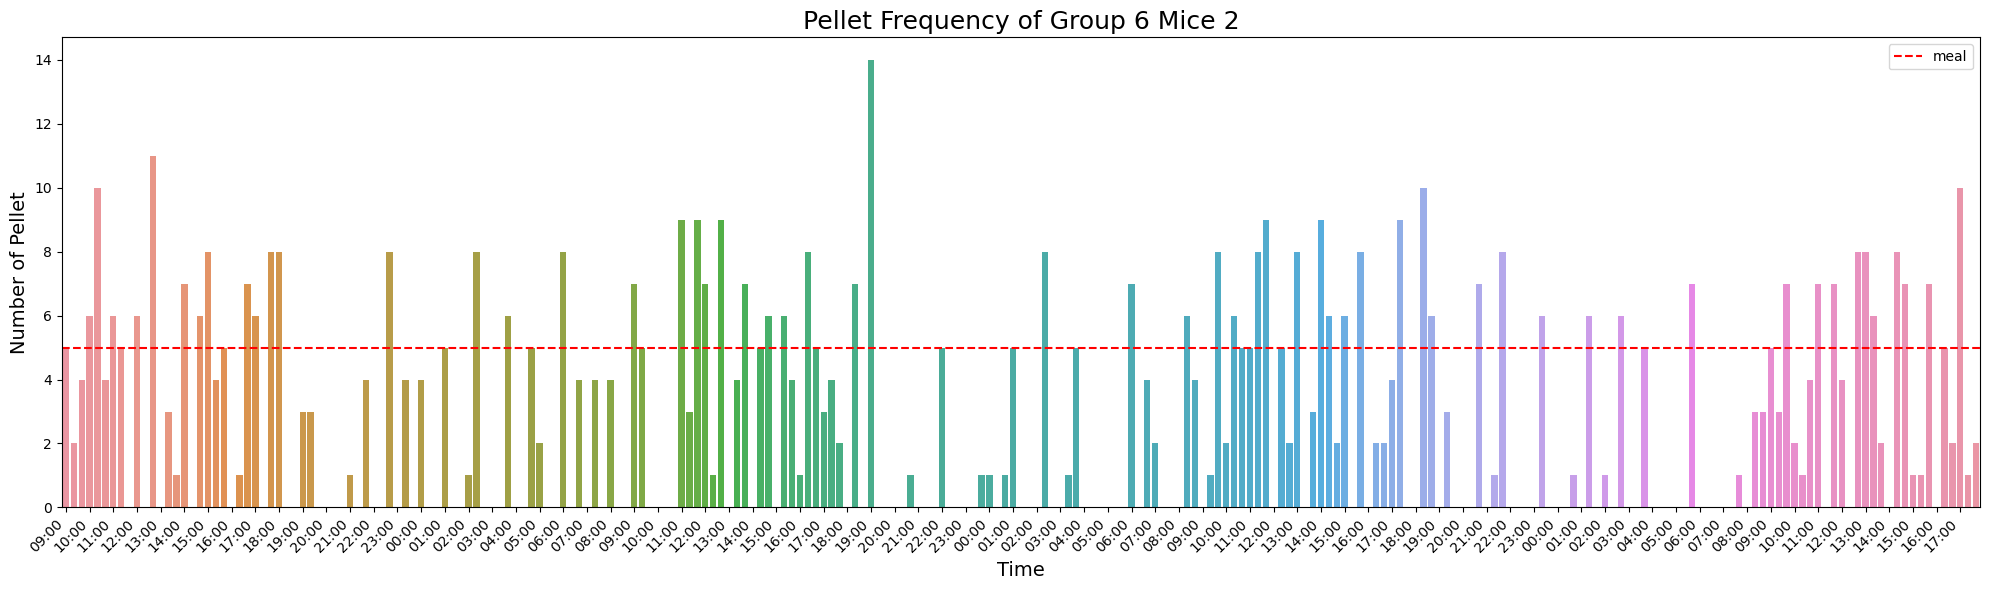

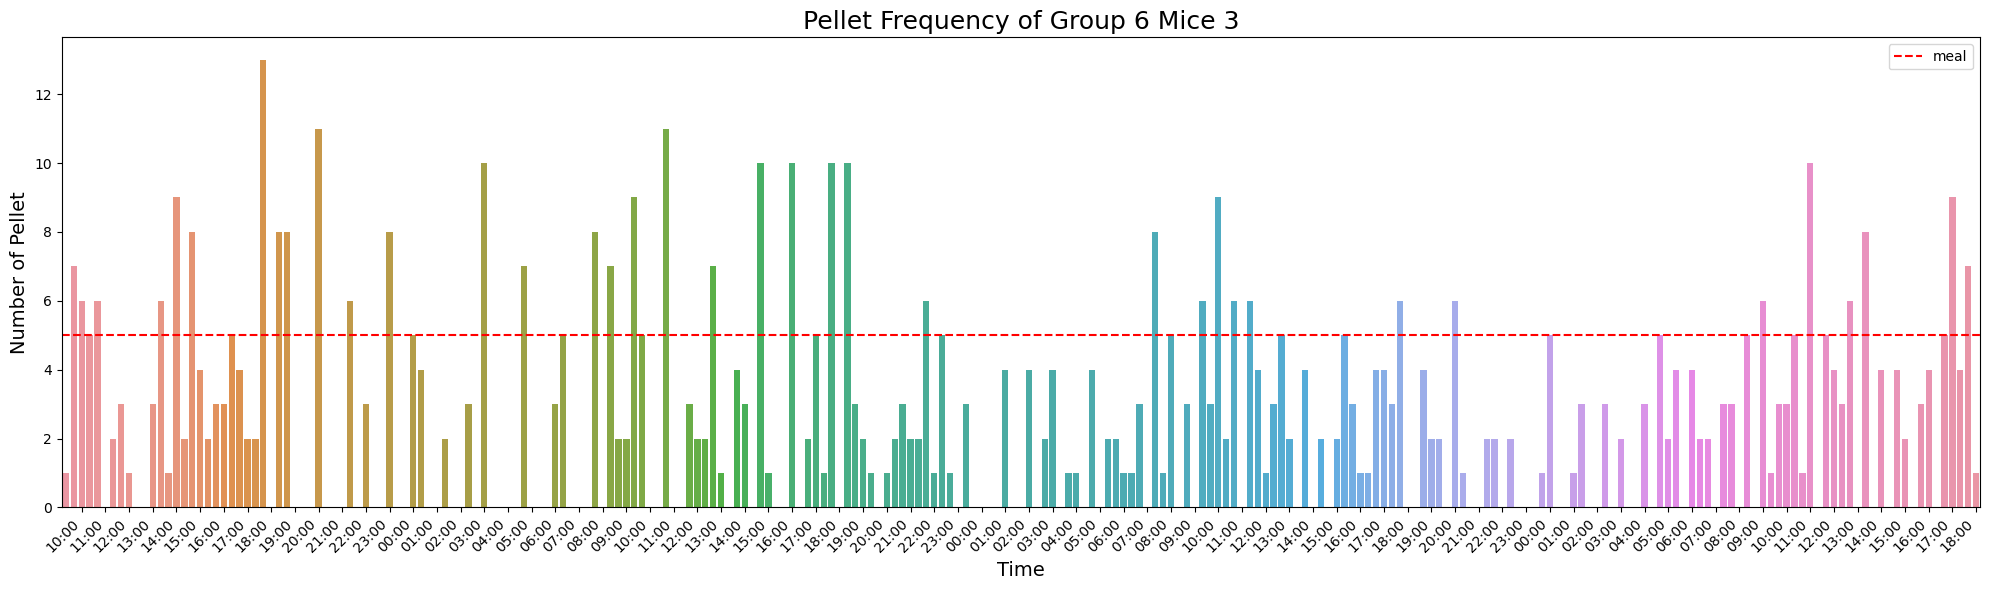

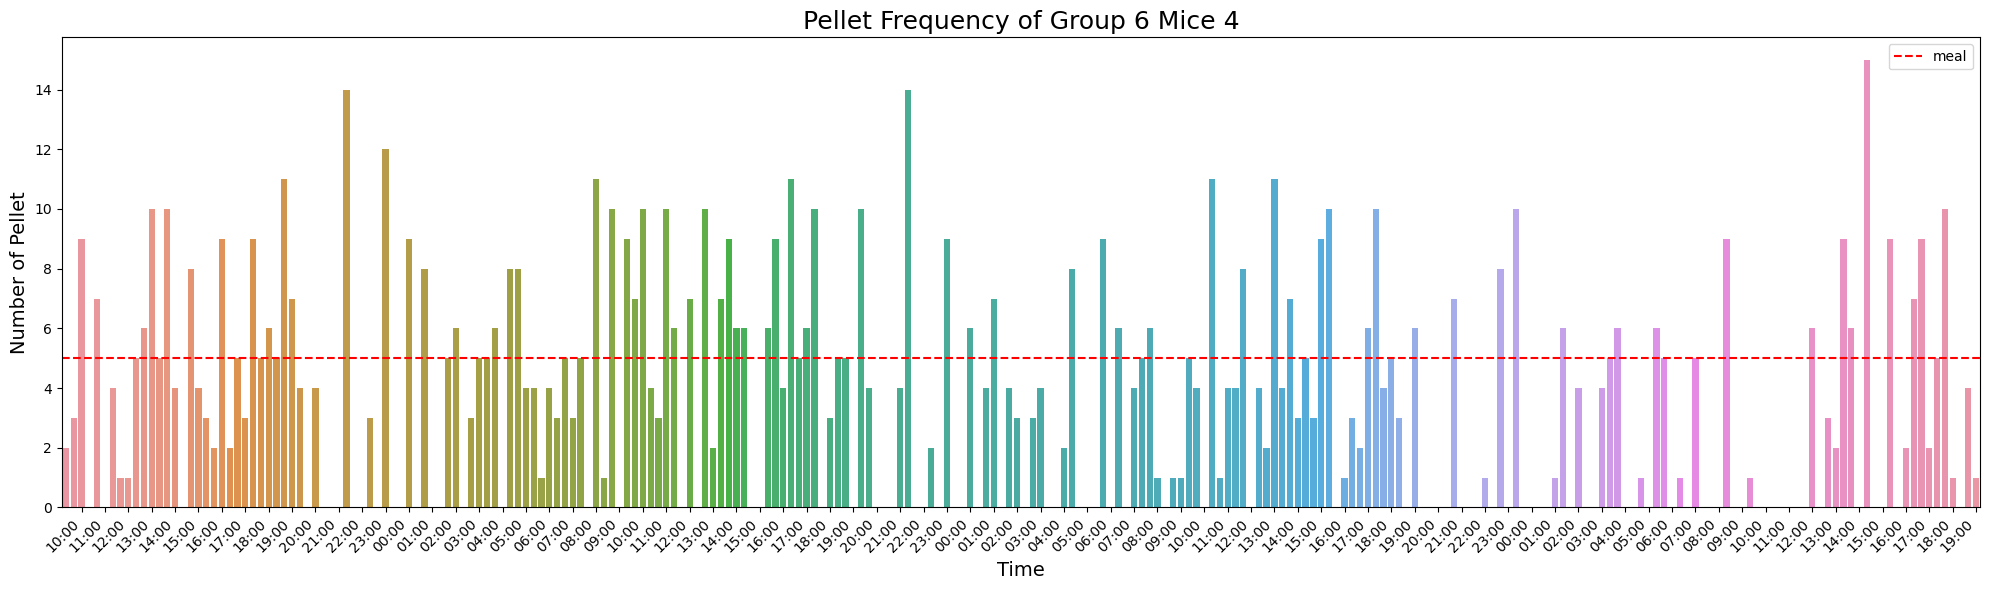

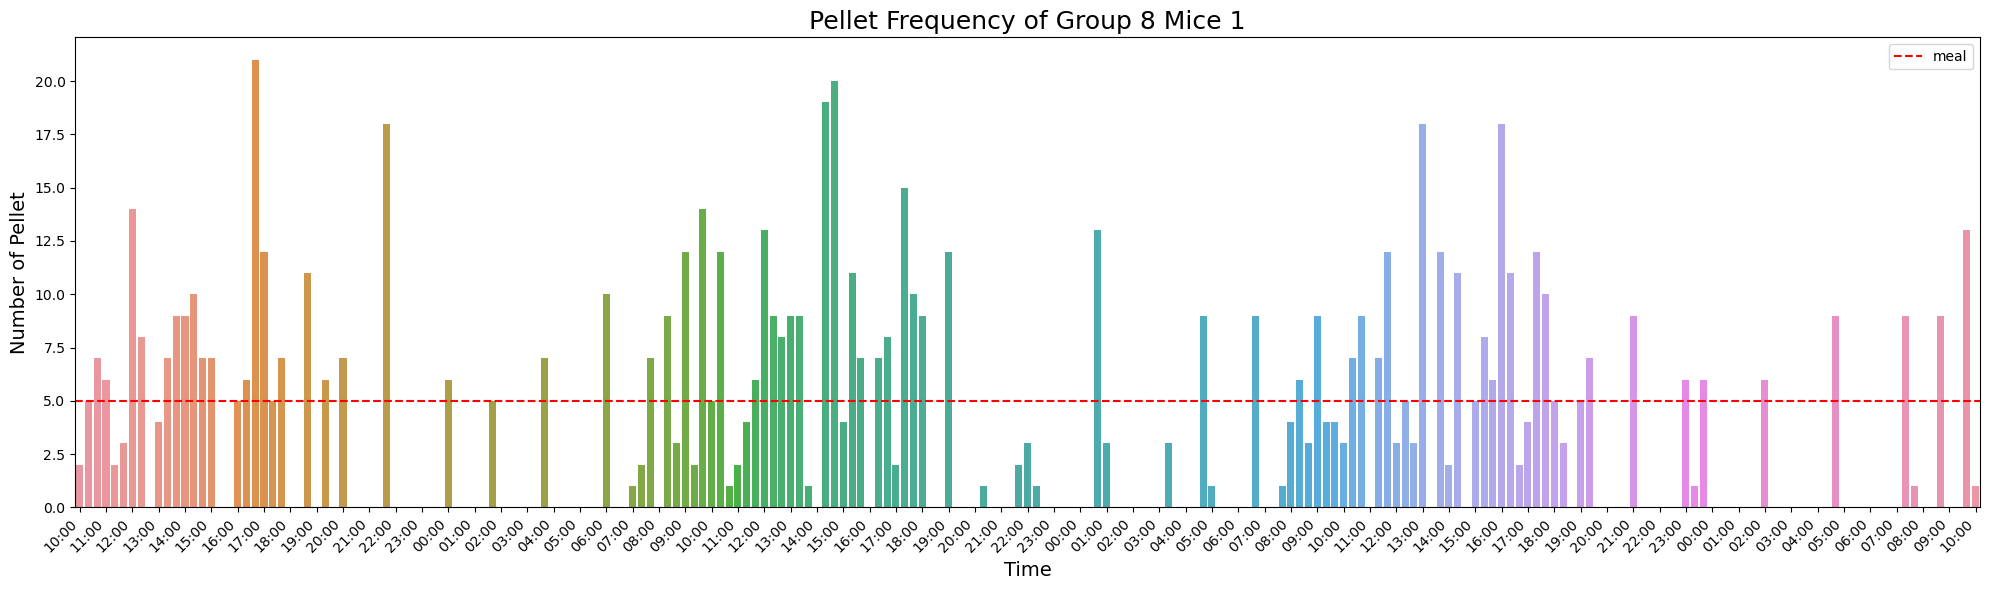

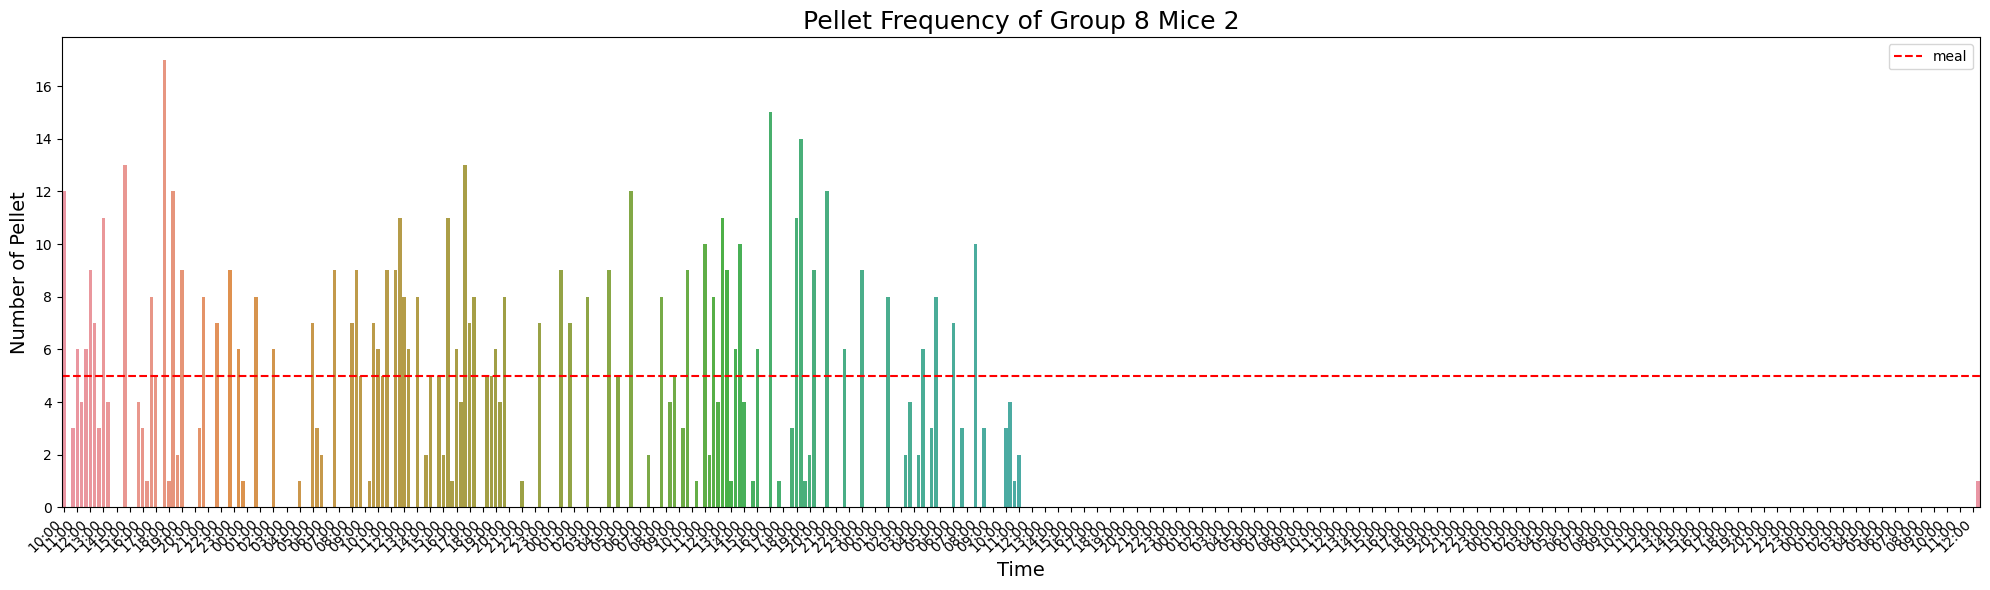

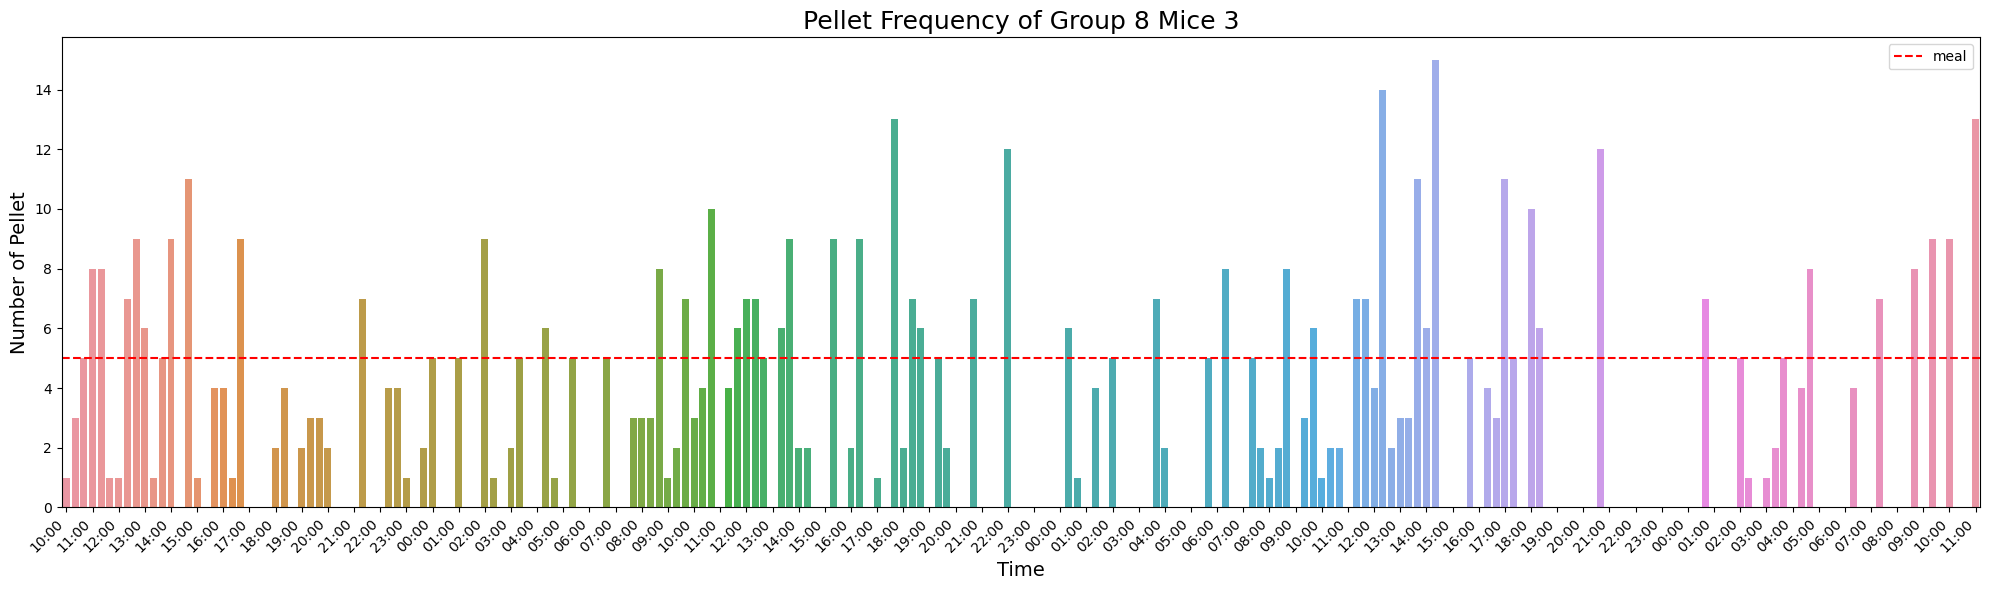

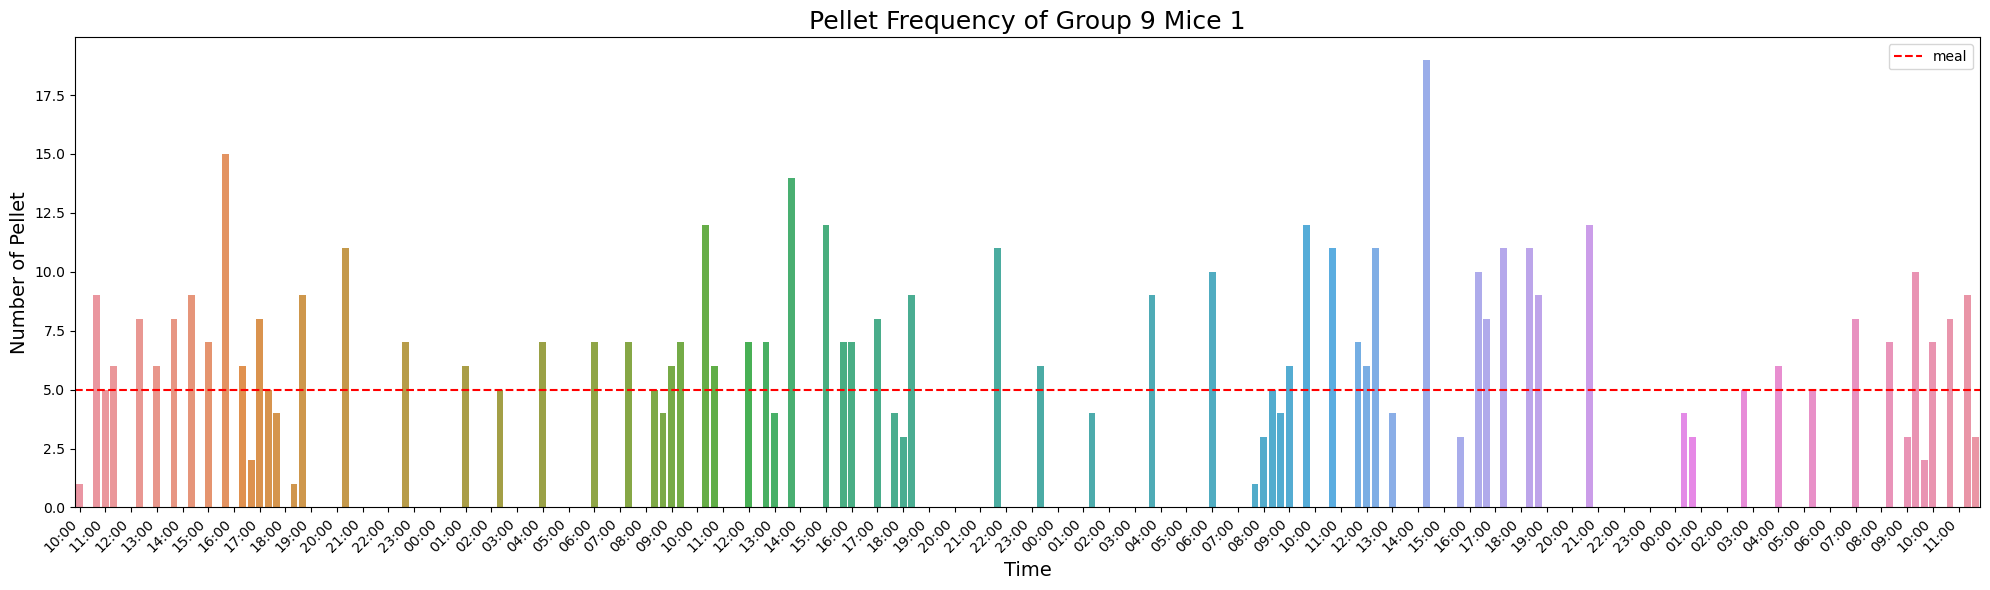

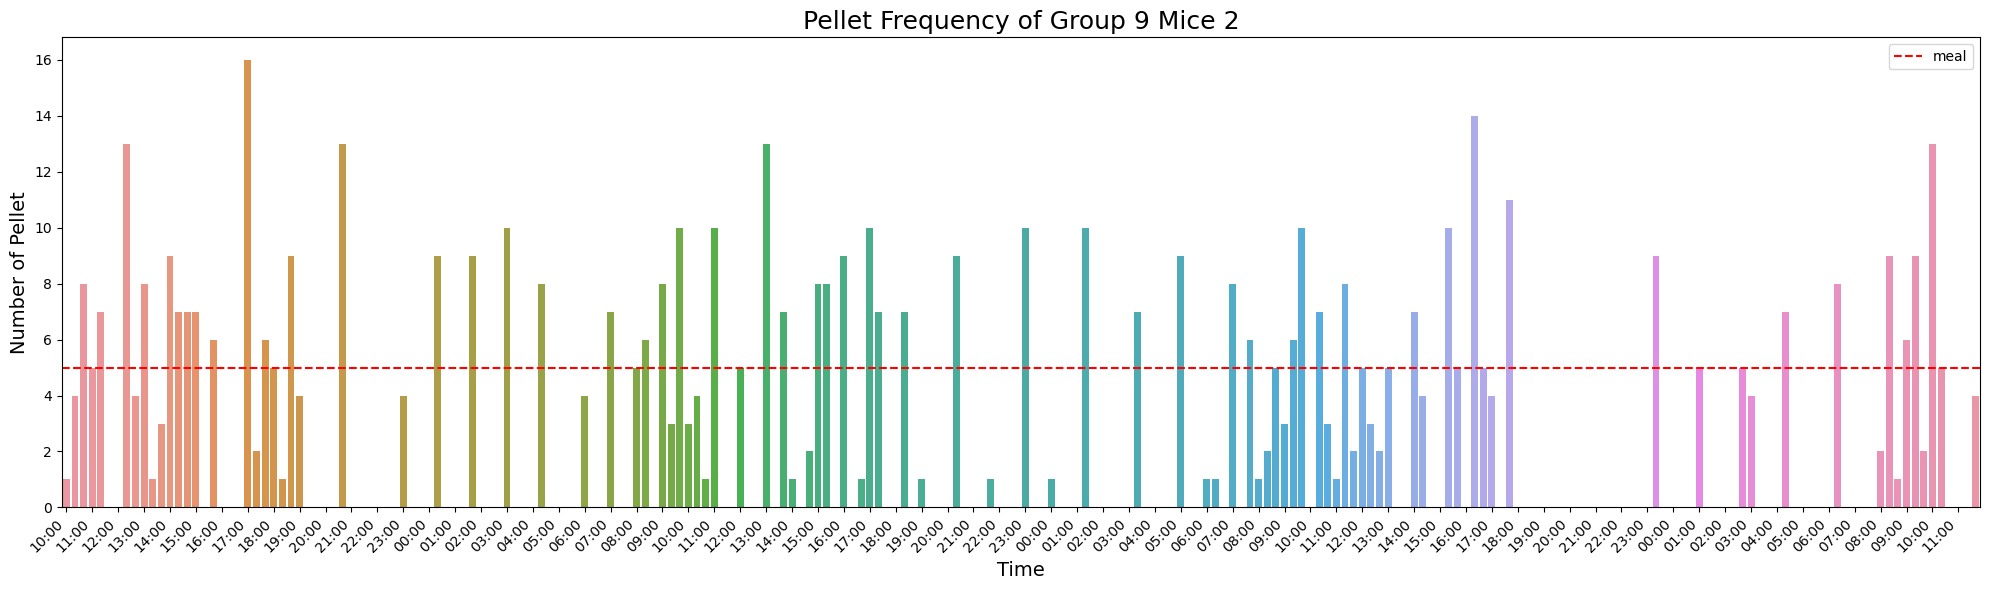

[8.203, 8.256, 7.723, 10.776, 11.292, 4.818, 8.493, 7.52, 8.158]


In [4]:
cask_avg_interval = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    cask_avg_interval.append(ml.average_pellet(group))
    ml.graph_pellet_frequency(group, bhv, num)
print(cask_avg_interval)

### Pellet Interval Analysis

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import intervals as invs

alpha = 0.1

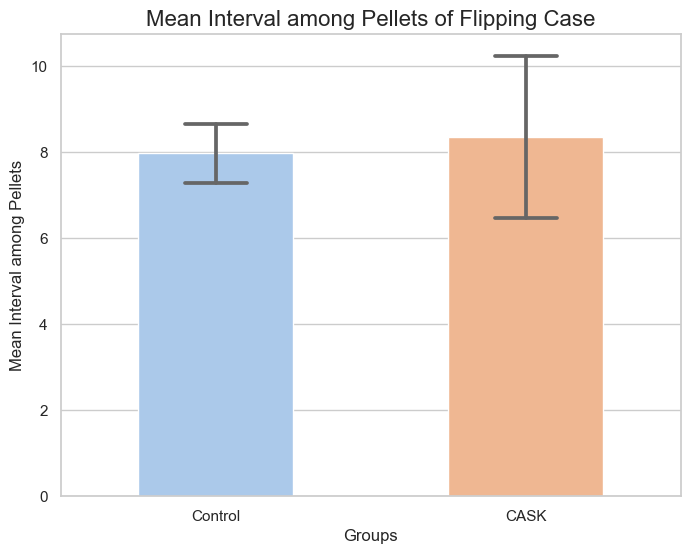

In [6]:
average = [
    np.mean(ctrl_avg_interval),
    np.mean(cask_avg_interval)
]

# Create DataFrames for each group
data_ctrl = pd.DataFrame({'Group': 'Control', 'Value': ctrl_avg_interval})
data_cask = pd.DataFrame({'Group': 'CASK', 'Value': cask_avg_interval})

# Concatenate the two DataFrames
data = pd.concat([data_ctrl, data_cask])

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot with error bars
ax = sns.barplot(x="Group", y="Value", data=data, palette="pastel",
                 errorbar="sd", capsize=0.2, width=0.5, errcolor='0.4')

plt.title('Mean Interval among Pellets of Flipping Case', fontsize=16)
plt.xlabel('Groups')
plt.ylabel('Mean Interval among Pellets')
plt.show()


In [7]:
invs.perform_T_test(ctrl_avg_interval, cask_avg_interval, 0.1)

P Value is  0.6471359956745986
There is no significant difference between the two groups.


### Control Flip

In [8]:
ctrl_flip_avg = []
for path in paths.contigency_flip_ctrl:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_flip_avg.append(avg)

[2.097867803837953, 2.314209858931685, 2.9032100215306325, 2.4072937458416503, 2.746776232616941, 2.344201370585135]


### CASK Flip

In [9]:
cask_flip_avg = []
for path in paths.contigency_flip_cask:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_flip_avg.append(avg)

[2.1044429901105293, 2.1345338046840476, 2.3787123064384676, 1.6301439645625693, 1.4708731241473398, 3.0473860744853107, 2.0071624713958807, 1.9310146823666234, 2.2060922974767596]


##### Control flip && cask flip

In [10]:
invs.perform_T_test(ctrl_flip_avg, cask_flip_avg, 0.1)

P Value is  0.1052661079011084
There is no significant difference between the two groups.


## Interval Investigation for FR1 Group

In [11]:
path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

#### Control FR1

In [12]:
ctrl_fr1_interval = []

for sheet in paths.fr1_ctrl_sheet:
    data = ml.process_sheet(path, sheet=sheet)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    ctrl_fr1_interval.append(avg)

[2.6364524259609325, 2.4091036414565825, 2.1434656084656085, 1.6923560421735604, 2.097136563876652, 2.3443804824561405, 2.6752981795354676, 2.227656817003629, 2.8787, 2.234542586750788, 2.579356725146199]


##### Control FR1 && Control Flip

In [13]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg, 0.1)

P Value is  0.4984874683753151
There is no significant difference between the two groups.


### Cask FR1

In [14]:
cask_fr1_interval = []

for path in paths.fr1_cask_csvs:
    data = ml.process_csv(path)
    interval = invs.count_interval(data)
    avg = np.sum(interval) / len(interval)
    cask_fr1_interval.append(avg)

[2.8727095516569197, 2.348338692390139, 2.348713910761155, 2.3507973251028806, 2.9912856196156397, 1.8219030154849225, 2.8505813953488373, 2.3987711213517664, 2.58969696969697]


##### FR1 control && FR1 Cask

In [15]:
invs.perform_T_test(cask_fr1_interval, ctrl_fr1_interval)

P Value is  0.3400393187740731
There is no significant difference between the two groups.


CASK flip and fr1

In [16]:
invs.perform_T_test(cask_flip_avg, cask_fr1_interval)

P Value is  0.051425812005217446
There is no significant difference between the two groups.


Control flip and fr1

In [17]:
invs.perform_T_test(ctrl_fr1_interval, ctrl_flip_avg)

P Value is  0.4984874683753151
There is no significant difference between the two groups.


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals